# Training data processor

Download images by specifying the keyword to search, resize them into the same size and make them grayscaled.  
This notebook can be used to prepare for image classification.

## Hyperparameters

- KEYWORDS: The keywords to search images.
- SAVE_IMAGE_DIR: A path of directory we will save images to.
- FILE_COUNT: The number of images you want to download for each keywords.
- IMAGE_SIZE: The size of an image which will be generated.

In [1]:
KEYWORDS = ["sword", "shield"]
SAVE_IMAGES_DIR = "data"
FILE_COUNT = 500
IMAGE_SIZE = (64, 64)

## Get images to learn from Bing

Use `icrawler` module to download images.
It may take long time. 

In [2]:
from icrawler.builtin import BingImageCrawler
import shutil
import os

if os.path.exists(SAVE_IMAGES_DIR):
    shutil.rmtree(SAVE_IMAGES_DIR)

for key in KEYWORDS:
    save_dir = SAVE_IMAGES_DIR + "/downloads/" + key
    
    os.makedirs(save_dir)

    google_crawler = BingImageCrawler(storage={"root_dir": save_dir})
    google_crawler.crawl(keyword=key, max_num=FILE_COUNT)

TTPSConnectionPool(host='dyn0.media.forbiddenplanet.com', port=443): Max retries exceeded with url: /products/000_aJcwjs0.jpg (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x0000021E86FB8748>, 'Connection to dyn0.media.forbiddenplanet.com timed out. (connect timeout=5)')), remaining retry times: 0
2020-05-31 16:39:54,112 - INFO - parser - parsing result page https://www.bing.com/images/async?q=shield&first=200
2020-05-31 16:39:55,935 - INFO - downloader - image #115	http://www.aceros-de-hispania.com/imagen/escudos-medieval-981/escudo-medieval-981.jpg
2020-05-31 16:39:56,019 - INFO - downloader - image #116	https://i.ytimg.com/vi/OBRUMCVSehs/maxresdefault.jpg
2020-05-31 16:39:57,064 - INFO - downloader - image #117	https://getasword.com/2286-thickbox_default/templar-knight-shield.jpg
2020-05-31 16:39:57,171 - ERROR - downloader - Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/6/64/Ag-obj-5959-001-pub-large.jpg
2

## Resize images and make them grayscaled

In [3]:
import os
from PIL import Image

for key in KEYWORDS:
    read_dir = SAVE_IMAGES_DIR + "/downloads/" + key
    save_dir = SAVE_IMAGES_DIR + "/" + key

    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    for file in os.listdir(read_dir):
        img = Image.open(read_dir + "/" + file).convert("L")
        img = img.resize(IMAGE_SIZE, Image.ANTIALIAS)
        img.save(save_dir + "/" + file)

## Watch some of them

This cell is not necessary, but we can check whether crawling task was completed successfully or not from this.

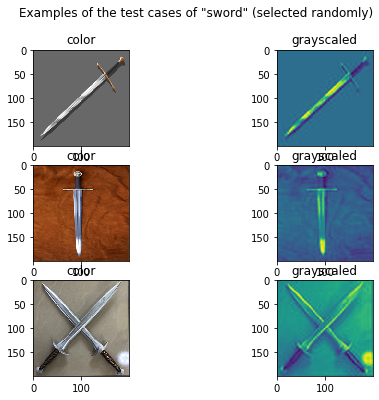

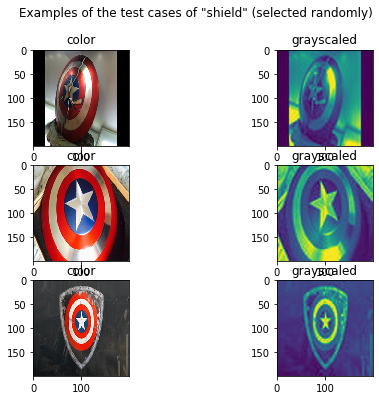

In [4]:
import matplotlib.pyplot as plt

for key in KEYWORDS:
    image_dir = SAVE_IMAGES_DIR + "/downloads/" + key
    grayscaled_dir = SAVE_IMAGES_DIR + "/" + key

    fig, axs = plt.subplots(3, 2, figsize=(8, 6))
    fig.suptitle(f"Examples of the test cases of \"{key}\" (selected randomly)")

    count = 0
    for file in os.listdir(image_dir)[:3]:
        axs[count, 0].imshow(Image.open(image_dir + "/" + file).resize((200, 200), Image.ANTIALIAS))
        axs[count, 0].set_title("color")
        axs[count, 1].imshow(Image.open(grayscaled_dir + "/" + file).resize((200, 200), Image.ANTIALIAS))
        axs[count, 1].set_title("grayscaled")
        count = count + 1
    
    fig.show()